1. Graph from one of the output log file

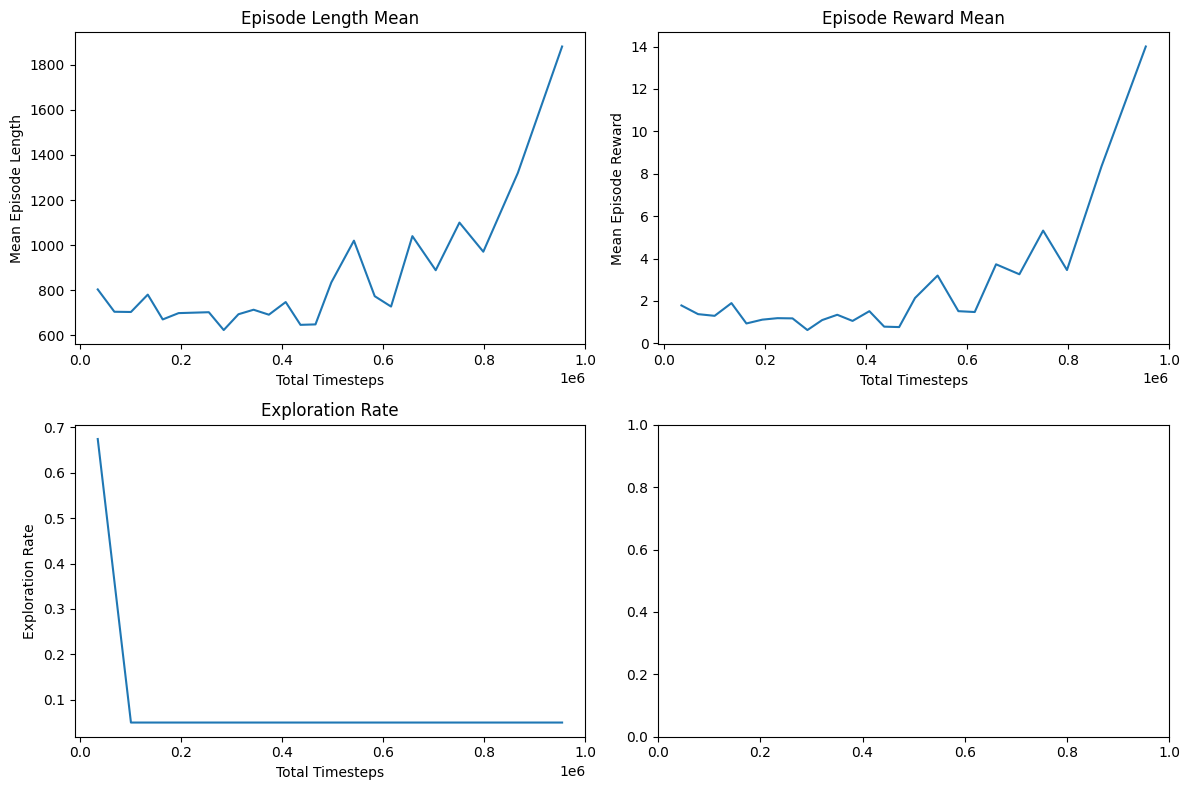

In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import os

# Initialize empty lists to store data
ep_len_mean = []
ep_rew_mean = []
exploration_rate = []
total_timesteps = []

# Read the log file
with open("dqn_breakout_00_log.txt", "r") as file:
    lines = file.readlines()

# Regular expression pattern to match relevant lines
pattern = r"\|\s+(ep_len_mean|ep_rew_mean|exploration_rate|total_timesteps)\s+\|\s+([0-9.e+-]+)"

for line in lines:
    match = re.search(pattern, line)
    if match:
        category, value = match.groups()
        if category == "ep_len_mean":
            ep_len_mean.append(float(value))
        elif category == "ep_rew_mean":
            ep_rew_mean.append(float(value))
        elif category == "exploration_rate":
            exploration_rate.append(float(value))
        elif category == "total_timesteps":
            total_timesteps.append(float(value))

# Create a DataFrame
data = pd.DataFrame({
    "Total Timesteps": total_timesteps,
    "Episode Length Mean": ep_len_mean,
    "Episode Reward Mean": ep_rew_mean,
    "Exploration Rate": exploration_rate
})

# Create subplots for different statistics
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot Episode Length Mean
axes[0, 0].plot(data["Total Timesteps"], data["Episode Length Mean"])
axes[0, 0].set_title("Episode Length Mean")
axes[0, 0].set_xlabel("Total Timesteps")
axes[0, 0].set_ylabel("Mean Episode Length")

# Plot Episode Reward Mean
axes[0, 1].plot(data["Total Timesteps"], data["Episode Reward Mean"])
axes[0, 1].set_title("Episode Reward Mean")
axes[0, 1].set_xlabel("Total Timesteps")
axes[0, 1].set_ylabel("Mean Episode Reward")

# Plot Exploration Rate
axes[1, 0].plot(data["Total Timesteps"], data["Exploration Rate"])
axes[1, 0].set_title("Exploration Rate")
axes[1, 0].set_xlabel("Total Timesteps")
axes[1, 0].set_ylabel("Exploration Rate")

# You can add more plots as needed

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

2. Graph from the all the output log file

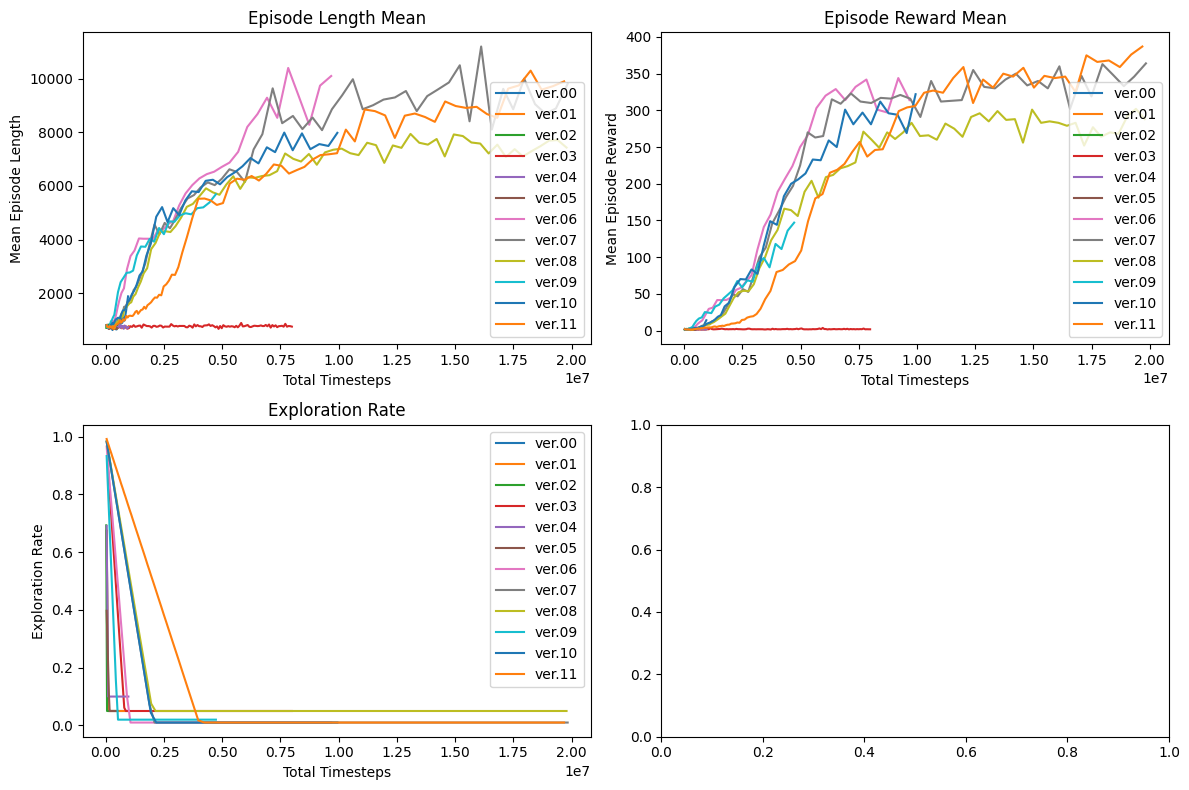

In [2]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import os

# Initialize empty lists to store data for each log file
log_files = [
    "dqn_breakout_00_log.txt",
    "dqn_breakout_01_log.txt",
    "dqn_breakout_02_log.txt",
    "dqn_breakout_03_log.txt",
    "dqn_breakout_04_log.txt",
    "dqn_breakout_05_log.txt",
    "dqn_breakout_06_log.txt",
    "dqn_breakout_07_log.txt",
    "dqn_breakout_08_log.txt",
    "dqn_breakout_09_log.txt",
    "dqn_breakout_10_log.txt",
    "dqn_breakout_11_log.txt"
]

# Create a dictionary to store data for each log file
data_dict = {}

# Regular expression pattern to match relevant lines
pattern = r"\|\s+(ep_len_mean|ep_rew_mean|exploration_rate|total_timesteps)\s+\|\s+([0-9.e+-]+)"

# Loop through log files and extract data
for log_file in log_files:
    with open(log_file, "r") as file:
        lines = file.readlines()

    # Initialize lists for this log file
    ep_len_mean = []
    ep_rew_mean = []
    exploration_rate = []
    total_timesteps = []

    for line in lines:
        match = re.search(pattern, line)
        if match:
            category, value = match.groups()
            if category == "ep_len_mean":
                ep_len_mean.append(float(value))
            elif category == "ep_rew_mean":
                ep_rew_mean.append(float(value))
            elif category == "exploration_rate":
                exploration_rate.append(float(value))
            elif category == "total_timesteps":
                total_timesteps.append(float(value))

    # Create a DataFrame for this log file
    data = pd.DataFrame({
        "Total Timesteps": total_timesteps,
        f"Episode Length Mean (ver.{log_file[13:15]})": ep_len_mean,
        f"Episode Reward Mean (ver.{log_file[13:15]})": ep_rew_mean,
        f"Exploration Rate (ver.{log_file[13:15]})": exploration_rate
    })

    # Store the data in the dictionary
    data_dict[log_file] = data

# Create subplots for different statistics
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Loop through the log files and plot the data
for log_file, data in data_dict.items():
    axes[0, 0].plot(data["Total Timesteps"], data[f"Episode Length Mean (ver.{log_file[13:15]})"], label=f"ver.{log_file[13:15]}")
    axes[0, 1].plot(data["Total Timesteps"], data[f"Episode Reward Mean (ver.{log_file[13:15]})"], label=f"ver.{log_file[13:15]}")
    axes[1, 0].plot(data["Total Timesteps"], data[f"Exploration Rate (ver.{log_file[13:15]})"], label=f"ver.{log_file[13:15]}")

# Add legends
axes[0, 0].legend()
axes[0, 1].legend()
axes[1, 0].legend()

# Set titles and labels
axes[0, 0].set_title("Episode Length Mean")
axes[0, 0].set_xlabel("Total Timesteps")
axes[0, 0].set_ylabel("Mean Episode Length")

axes[0, 1].set_title("Episode Reward Mean")
axes[0, 1].set_xlabel("Total Timesteps")
axes[0, 1].set_ylabel("Mean Episode Reward")

axes[1, 0].set_title("Exploration Rate")
axes[1, 0].set_xlabel("Total Timesteps")
axes[1, 0].set_ylabel("Exploration Rate")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


3. Graph from the early models that did not show consistant improvment result (ver.00 ~ ver.05)

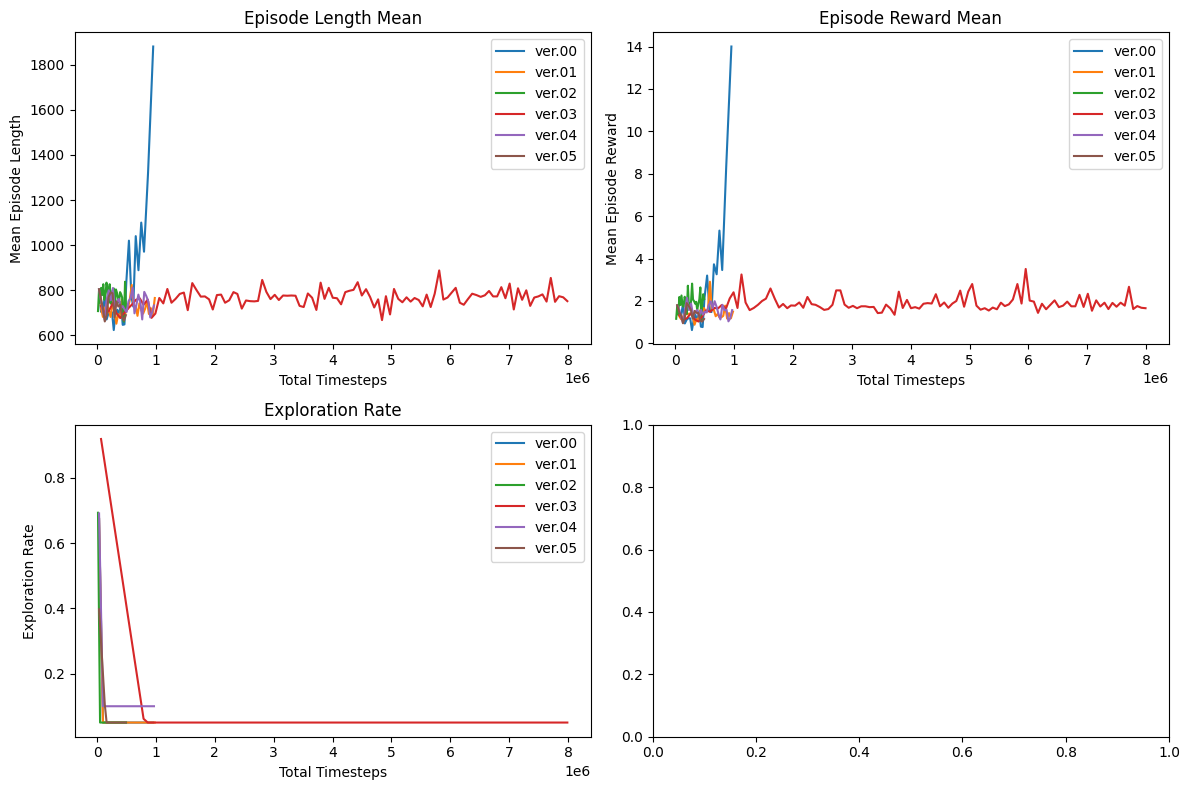

In [3]:
# Initialize empty lists to store data for each log file
log_files = [
    "dqn_breakout_00_log.txt",
    "dqn_breakout_01_log.txt",
    "dqn_breakout_02_log.txt",
    "dqn_breakout_03_log.txt",
    "dqn_breakout_04_log.txt",
    "dqn_breakout_05_log.txt"
]

# Create a dictionary to store data for each log file
data_dict = {}

# Regular expression pattern to match relevant lines
pattern = r"\|\s+(ep_len_mean|ep_rew_mean|exploration_rate|total_timesteps)\s+\|\s+([0-9.e+-]+)"

# Loop through log files and extract data
for log_file in log_files:
    with open(log_file, "r") as file:
        lines = file.readlines()

    # Initialize lists for this log file
    ep_len_mean = []
    ep_rew_mean = []
    exploration_rate = []
    total_timesteps = []

    for line in lines:
        match = re.search(pattern, line)
        if match:
            category, value = match.groups()
            if category == "ep_len_mean":
                ep_len_mean.append(float(value))
            elif category == "ep_rew_mean":
                ep_rew_mean.append(float(value))
            elif category == "exploration_rate":
                exploration_rate.append(float(value))
            elif category == "total_timesteps":
                total_timesteps.append(float(value))

    # Create a DataFrame for this log file
    data = pd.DataFrame({
        "Total Timesteps": total_timesteps,
        f"Episode Length Mean (ver.{log_file[13:15]})": ep_len_mean,
        f"Episode Reward Mean (ver.{log_file[13:15]})": ep_rew_mean,
        f"Exploration Rate (ver.{log_file[13:15]})": exploration_rate
    })

    # Store the data in the dictionary
    data_dict[log_file] = data

# Create subplots for different statistics
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Loop through the log files and plot the data
for log_file, data in data_dict.items():
    axes[0, 0].plot(data["Total Timesteps"], data[f"Episode Length Mean (ver.{log_file[13:15]})"], label=f"ver.{log_file[13:15]}")
    axes[0, 1].plot(data["Total Timesteps"], data[f"Episode Reward Mean (ver.{log_file[13:15]})"], label=f"ver.{log_file[13:15]}")
    axes[1, 0].plot(data["Total Timesteps"], data[f"Exploration Rate (ver.{log_file[13:15]})"], label=f"ver.{log_file[13:15]}")

# Add legends
axes[0, 0].legend()
axes[0, 1].legend()
axes[1, 0].legend()

# Set titles and labels
axes[0, 0].set_title("Episode Length Mean")
axes[0, 0].set_xlabel("Total Timesteps")
axes[0, 0].set_ylabel("Mean Episode Length")

axes[0, 1].set_title("Episode Reward Mean")
axes[0, 1].set_xlabel("Total Timesteps")
axes[0, 1].set_ylabel("Mean Episode Reward")

axes[1, 0].set_title("Exploration Rate")
axes[1, 0].set_xlabel("Total Timesteps")
axes[1, 0].set_ylabel("Exploration Rate")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

4. Graph the improved models that did show consistant improvment result (ver.06 ~ ver.11)

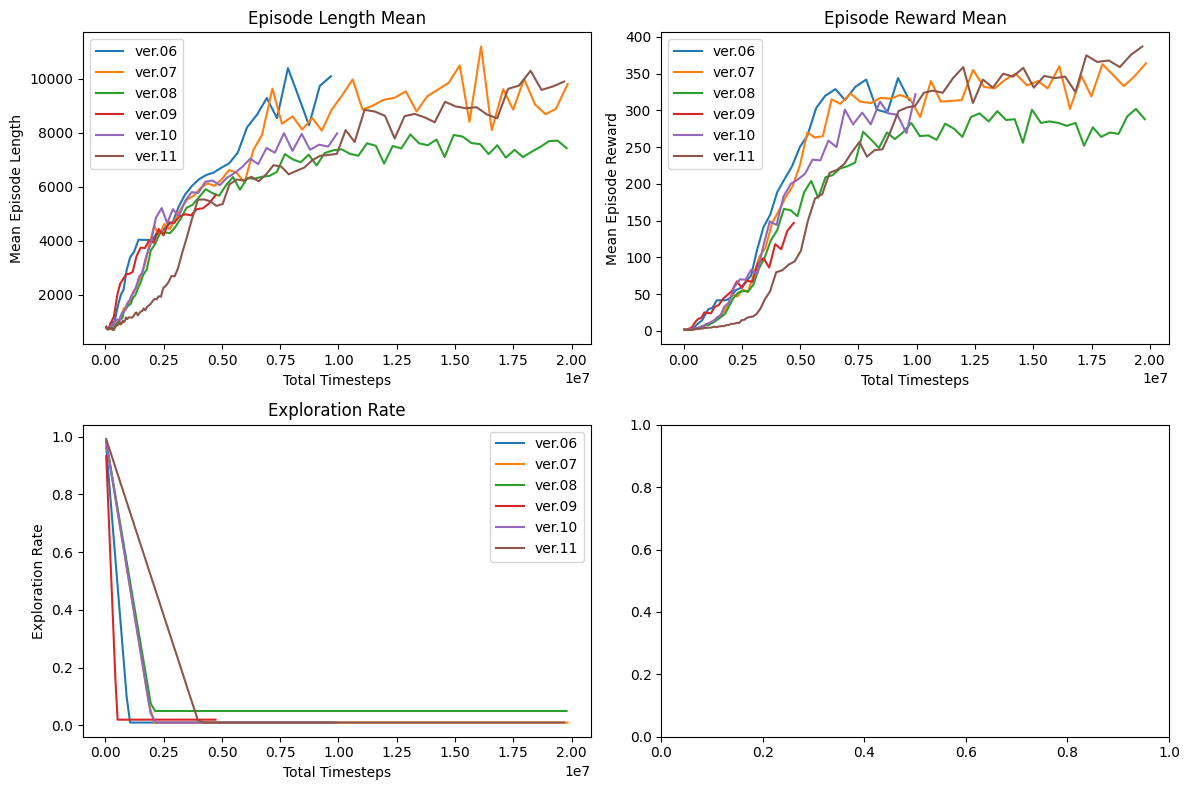

In [4]:
# Initialize empty lists to store data for each log file
log_files = [
    "dqn_breakout_06_log.txt",
    "dqn_breakout_07_log.txt",
    "dqn_breakout_08_log.txt",
    "dqn_breakout_09_log.txt",
    "dqn_breakout_10_log.txt",
    "dqn_breakout_11_log.txt"
]

# Create a dictionary to store data for each log file
data_dict = {}

# Regular expression pattern to match relevant lines
pattern = r"\|\s+(ep_len_mean|ep_rew_mean|exploration_rate|total_timesteps)\s+\|\s+([0-9.e+-]+)"

# Loop through log files and extract data
for log_file in log_files:
    with open(log_file, "r") as file:
        lines = file.readlines()

    # Initialize lists for this log file
    ep_len_mean = []
    ep_rew_mean = []
    exploration_rate = []
    total_timesteps = []

    for line in lines:
        match = re.search(pattern, line)
        if match:
            category, value = match.groups()
            if category == "ep_len_mean":
                ep_len_mean.append(float(value))
            elif category == "ep_rew_mean":
                ep_rew_mean.append(float(value))
            elif category == "exploration_rate":
                exploration_rate.append(float(value))
            elif category == "total_timesteps":
                total_timesteps.append(float(value))

    # Create a DataFrame for this log file
    data = pd.DataFrame({
        "Total Timesteps": total_timesteps,
        f"Episode Length Mean (ver.{log_file[13:15]})": ep_len_mean,
        f"Episode Reward Mean (ver.{log_file[13:15]})": ep_rew_mean,
        f"Exploration Rate (ver.{log_file[13:15]})": exploration_rate
    })

    # Store the data in the dictionary
    data_dict[log_file] = data

# Create subplots for different statistics
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Loop through the log files and plot the data
for log_file, data in data_dict.items():
    axes[0, 0].plot(data["Total Timesteps"], data[f"Episode Length Mean (ver.{log_file[13:15]})"], label=f"ver.{log_file[13:15]}")
    axes[0, 1].plot(data["Total Timesteps"], data[f"Episode Reward Mean (ver.{log_file[13:15]})"], label=f"ver.{log_file[13:15]}")
    axes[1, 0].plot(data["Total Timesteps"], data[f"Exploration Rate (ver.{log_file[13:15]})"], label=f"ver.{log_file[13:15]}")

# Add legends
axes[0, 0].legend()
axes[0, 1].legend()
axes[1, 0].legend()

# Set titles and labels
axes[0, 0].set_title("Episode Length Mean")
axes[0, 0].set_xlabel("Total Timesteps")
axes[0, 0].set_ylabel("Mean Episode Length")

axes[0, 1].set_title("Episode Reward Mean")
axes[0, 1].set_xlabel("Total Timesteps")
axes[0, 1].set_ylabel("Mean Episode Reward")

axes[1, 0].set_title("Exploration Rate")
axes[1, 0].set_xlabel("Total Timesteps")
axes[1, 0].set_ylabel("Exploration Rate")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()